<a href="https://colab.research.google.com/github/Drowser2430/Drowser2430/blob/main/Drowser_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train_data.csv to train_data.csv


In this step, I uploaded the dataset into Colab so I could start working with it. This makes the file accessible for pandas to read.


In [3]:
import pandas as pd


df = pd.read_csv('train_data.csv')
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,Cash loans,M,Y,N,0,175500.0,494550.0,45490.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,Cash loans,F,Y,Y,0,270000.0,1724688.0,54283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here, I used `pandas` to load the CSV file (`train_data.csv`) and display the first few rows to confirm it loaded correctly.


In [4]:
import numpy as np

# Only keep numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check if TARGET is in the numeric columns
print(numeric_df.columns)

# If it's not named 'TARGET', update this line accordingly
correlation = numeric_df.corr()['TARGET'].abs().sort_values(ascending=False)

# Get top 20 features (excluding TARGET itself)
top_20_features = correlation[1:21].index.tolist()

# Create a new DataFrame with those features + target
df_selected = df[top_20_features + ['TARGET']]
df_selected.head()


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,REG_CITY_NOT_LIVE_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,AMT_GOODS_PRICE,ELEVATORS_AVG,TARGET
0,0.177704,0.397762,NaN,-16180,2,2,-1755.0,0,-3495,1,...,-2037,0.1667,0.1667,0.1667,0,NaN,-3722.0,900000.0,0.0,0
1,0.538863,0.696312,0.697782,-14969,2,2,-3268.0,1,-4442,1,...,-162,0.0833,0.0833,0.0833,0,NaN,-5502.0,612000.0,0.0,0
2,0.355639,0.716972,NaN,-22213,2,2,0.0,0,-4674,0,...,365243,NaN,NaN,NaN,0,7.0,-12395.0,1795500.0,NaN,0
3,0.085033,0.662210,NaN,-19301,2,2,-1971.0,0,-2847,0,...,365243,NaN,NaN,NaN,1,22.0,-859.0,450000.0,NaN,0
4,0.627991,0.774506,NaN,-18409,2,2,-689.0,0,-1958,1,...,-886,0.1667,0.1667,0.1667,0,7.0,-3835.0,1575000.0,NaN,0


Since the assignment only allows up to 20 variables, I selected the top 20 features that had the strongest correlation (positive or negative) with the target variable. I filtered out all non-numeric columns so I could safely compute correlations.


In [5]:
# Only work with numeric features and target
numeric_df = df.select_dtypes(include=[np.number])

# Get top 20 features most correlated with TARGET
correlation = numeric_df.corr()['TARGET'].abs().sort_values(ascending=False)
top_20_features = correlation[1:21].index.tolist()

# Create DataFrame with selected features + target
df_selected = df[top_20_features + ['TARGET']]

# Drop rows with any missing values in those columns
df_selected_clean = df_selected.dropna()

# Check final shape
print("Final dataset shape:", df_selected_clean.shape)
df_selected_clean.head()


Final dataset shape: (9785, 21)


,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,REG_CITY_NOT_LIVE_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,AMT_GOODS_PRICE,ELEVATORS_AVG,TARGET
10,0.191822,0.575017,0.428265,-15082,3,3,-1436.0,1,-4411,1,...,-1624,0.2500,0.2083,0.2083,0,10.0,-2233.0,270000.0,0.0932,0
23,0.418854,0.633958,0.388735,-11961,2,2,-3353.0,0,-4574,1,...,-3707,0.3333,0.3333,0.3333,0,8.0,-5896.0,45000.0,0.1200,0
29,0.646330,0.594606,0.425257,-12721,2,2,-2560.0,0,-4979,1,...,-1487,0.1667,0.1667,0.1667,0,3.0,-6771.0,652500.0,0.0000,0
45,0.597192,0.295852,0.682442,-18895,2,2,-1507.0,1,-2458,1,...,-5271,0.0833,0.0833,0.0833,0,5.0,-193.0,1125000.0,0.0000,0
47,0.399676,0.042717,0.149801,-12529,2,2,-101.0,0,-4577,1,...,-554,0.1667,0.1667,0.1667,0,7.0,-1027.0,225000.0,0.0000,0


I created a new dataframe using only the selected top 20 features + the target. Then I dropped any rows with missing values to avoid issues during model training.


In [6]:
from sklearn.model_selection import train_test_split

X = df_selected_clean.drop('TARGET', axis=1)
y = df_selected_clean['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (6849, 20)
X_test shape: (2936, 20)
y_train distribution:
 TARGET
0    0.943787
1    0.056213
Name: proportion, dtype: float64
y_test distribution:
 TARGET
0    0.943801
1    0.056199
Name: proportion, dtype: float64


I split the data into training and testing sets using a 70/30 split. I also used `stratify=y` to make sure the class balance was preserved in both sets.


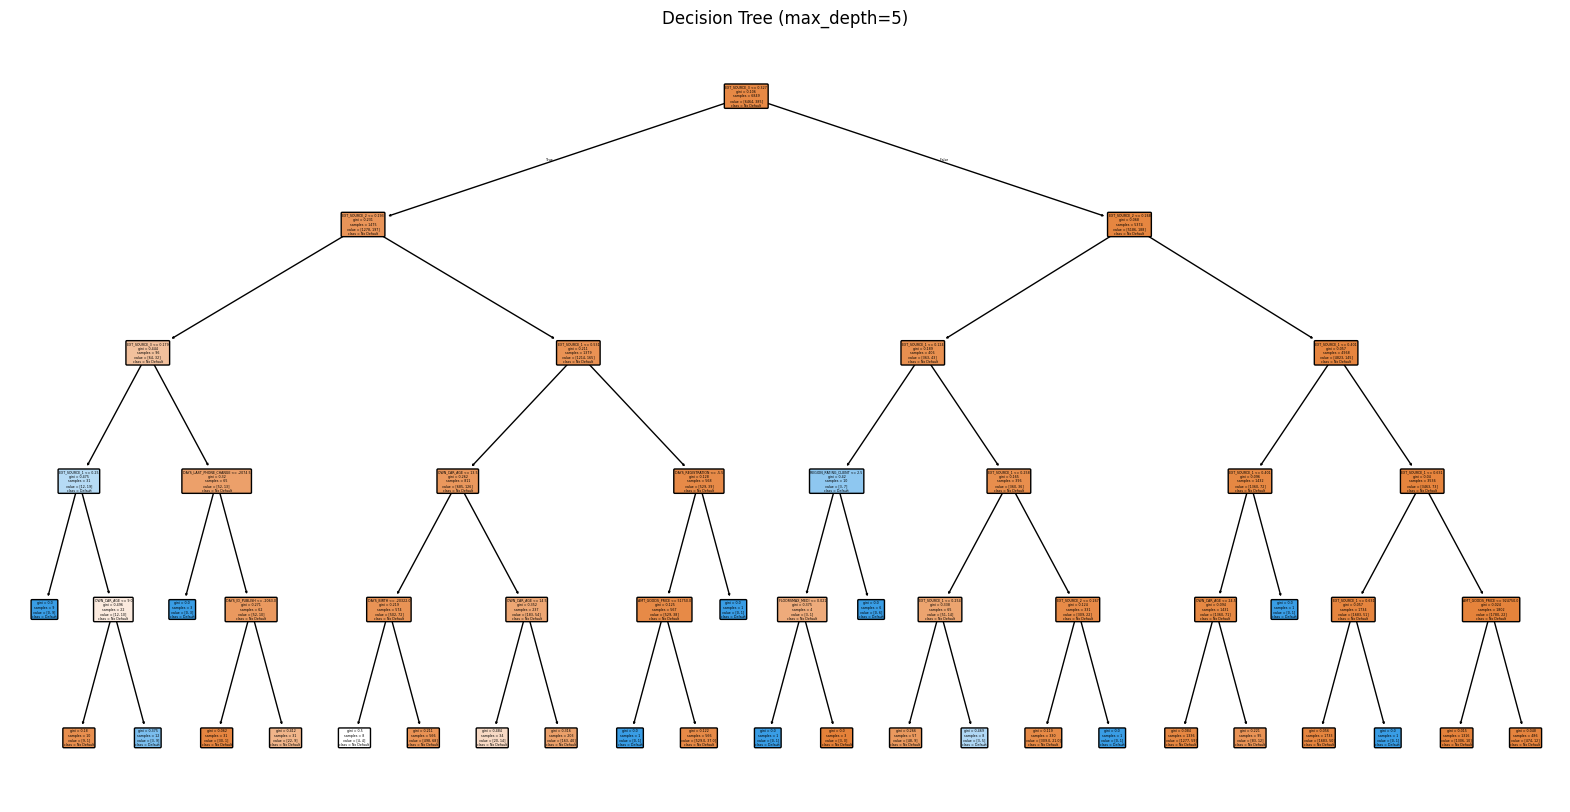

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree (max_depth=5)")
plt.show()


I trained a Decision Tree with a maximum depth of 5 to avoid overfitting and keep the model simple. Then I visualized the tree to see how the model made its decisions.


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

I trained a Random Forest using the same 20 features and same max depth (5) so I could make a fair comparison to the Decision Tree. Random Forest usually performs better because it reduces variance across multiple trees.


In [13]:
# --- Decision Tree ---
y_pred_dt = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

print("📊 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt, zero_division=0))
print("ROC AUC Score (Decision Tree):", roc_auc_score(y_test, dt_probs))


# --- Random Forest ---
y_pred_rf = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

print("\n🌲 Random Forest Results:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("ROC AUC Score (Random Forest):", roc_auc_score(y_test, rf_probs))


📊 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2771
           1       0.35      0.04      0.07       165

    accuracy                           0.94      2936
   macro avg       0.65      0.52      0.52      2936
weighted avg       0.91      0.94      0.92      2936

ROC AUC Score (Decision Tree): 0.7242183655391884

🌲 Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2771
           1       0.00      0.00      0.00       165

    accuracy                           0.94      2936
   macro avg       0.47      0.50      0.49      2936
weighted avg       0.89      0.94      0.92      2936

ROC AUC Score (Random Forest): 0.766934593134521


I evaluated both models using precision, recall, F1-score, and ROC AUC. I added `zero_division=0` to avoid errors when a class isn't predicted.

- The **Decision Tree** predicted a few defaults (class 1), resulting in a small recall and precision for that class. ROC AUC was 0.72.
- The **Random Forest** didn’t predict any class 1s, so recall and precision were 0.00, but its ROC AUC was slightly better at 0.77, meaning it ranked risky cases better, even though it didn’t classify them well.

This shows how accuracy alone isn't enough to evaluate performance when the dataset is imbalanced.


Both models achieved high accuracy (~94%) largely due to the class imbalance in the dataset. The Decision Tree was able to identify a small number of defaults, while the Random Forest completely missed them but achieved a higher ROC AUC score.

This assignment helped me understand the importance of evaluating models using more than just accuracy—especially with imbalanced classes. In the future, I’d explore using SMOTE, class weights, or hyperparameter tuning to improve detection of the minority class.
